<a href="https://colab.research.google.com/github/ziedjouini/machine-learning/blob/main/Regression_House_sales_zied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv"
df_house = pd.read_csv(link)
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,NaN,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,NaN,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,NaN,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Créez vous-même un notebook sur Google Colaboratory que vous nommerez : **Regression House sales - Your First and Last Name **
     Effectuez une première analyse du jeu de données, avec tout ce que vous savez (description, info, quantile, etc...), et une analyse graphique (notamment avec quelques boxplots, pairplots et heatmap de corrélation)
     

In [2]:
df_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.160900e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401174e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671546e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df_house.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016826,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016826,1.000000,0.308330,0.525168,0.702040,0.089639,0.256894,0.266367,0.397280,0.036314,0.667444,0.605574,0.323782,0.054123,0.126420,-0.053150,0.307012,0.021601,0.585372,0.082420
bedrooms,0.001286,0.308330,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525168,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702040,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089639,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256894,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266367,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397280,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036314,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [6]:
# To find the correlation among
# the columns using kendall method
df_house.corr(method='kendall')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.003168,0.004783,0.010621,0.001163,-0.078604,0.014716,-0.002917,0.010071,-0.018952,0.014891,0.002362,0.001006,0.018131,-0.014134,-0.003870,-0.002613,0.004345,0.000038,-0.077349
price,0.003168,1.000000,0.265093,0.369246,0.463642,0.047134,0.251732,0.094074,0.237572,0.014439,0.527864,0.378265,0.190365,0.070415,0.082371,-0.009761,0.292838,0.039859,0.405052,0.038368
bedrooms,0.004783,0.265093,1.000000,0.439437,0.521343,0.164711,0.201755,-0.007075,0.074568,0.011399,0.330748,0.429226,0.196839,0.141344,0.015510,-0.127689,-0.015598,0.144266,0.346039,0.153098
bathrooms,0.010621,0.369246,0.439437,1.000000,0.588170,0.049858,0.450942,0.043063,0.133024,-0.137527,0.556446,0.530538,0.153178,0.428921,0.036671,-0.143637,0.005416,0.187418,0.430040,0.045497
sqft_living,0.001163,0.463642,0.521343,0.588170,1.000000,0.206619,0.316298,0.057522,0.187790,-0.049774,0.586439,0.697149,0.266206,0.244636,0.042652,-0.138096,0.020369,0.191623,0.570275,0.192472
sqft_lot,-0.078604,0.047134,0.164711,0.049858,0.206619,1.000000,-0.186403,0.069937,0.094163,0.090208,0.111692,0.185633,0.028180,-0.005228,0.006929,-0.205182,-0.080586,0.258072,0.244149,0.792305
floors,0.014716,0.251732,0.201755,0.450942,0.316298,-0.186403,1.000000,0.022804,0.018461,-0.265336,0.435440,0.475418,-0.236002,0.417252,0.011893,-0.049725,0.019379,0.115424,0.239920,-0.183754
waterfront,-0.002917,0.094074,-0.007075,0.043063,0.057522,0.069937,0.022804,1.000000,0.280157,0.016213,0.056808,0.044589,0.047104,-0.023492,0.090711,0.024369,-0.015552,-0.031180,0.061023,0.075399
view,0.010071,0.237572,0.074568,0.133024,0.187790,0.094163,0.018461,0.280157,1.000000,0.043801,0.195493,0.116269,0.211609,-0.053792,0.093918,0.063370,-0.000090,-0.082784,0.206549,0.093819
condition,-0.018952,0.014439,0.011399,-0.137527,-0.049774,0.090208,-0.265336,0.016213,0.043801,1.000000,-0.148802,-0.125830,0.141993,-0.319079,-0.063436,-0.018536,-0.017630,-0.068146,-0.069246,0.092523


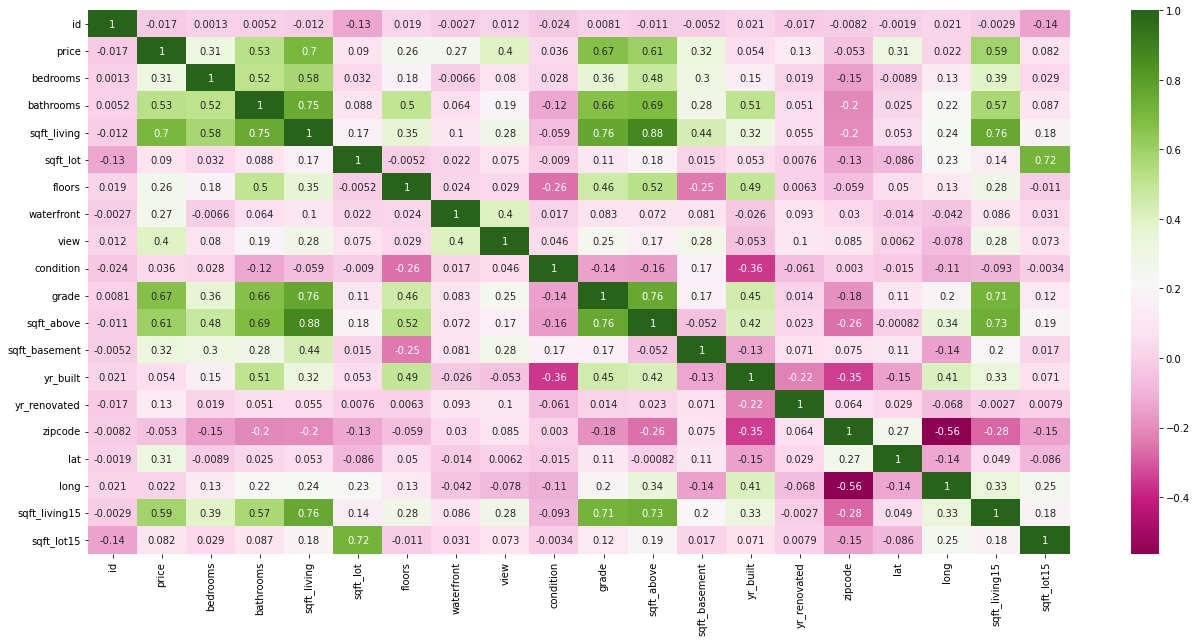

In [7]:
plt.figure(figsize=(22,10))
sns.heatmap(df_house.corr(),cmap="PiYG",annot=True)

plt.show()

In [13]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

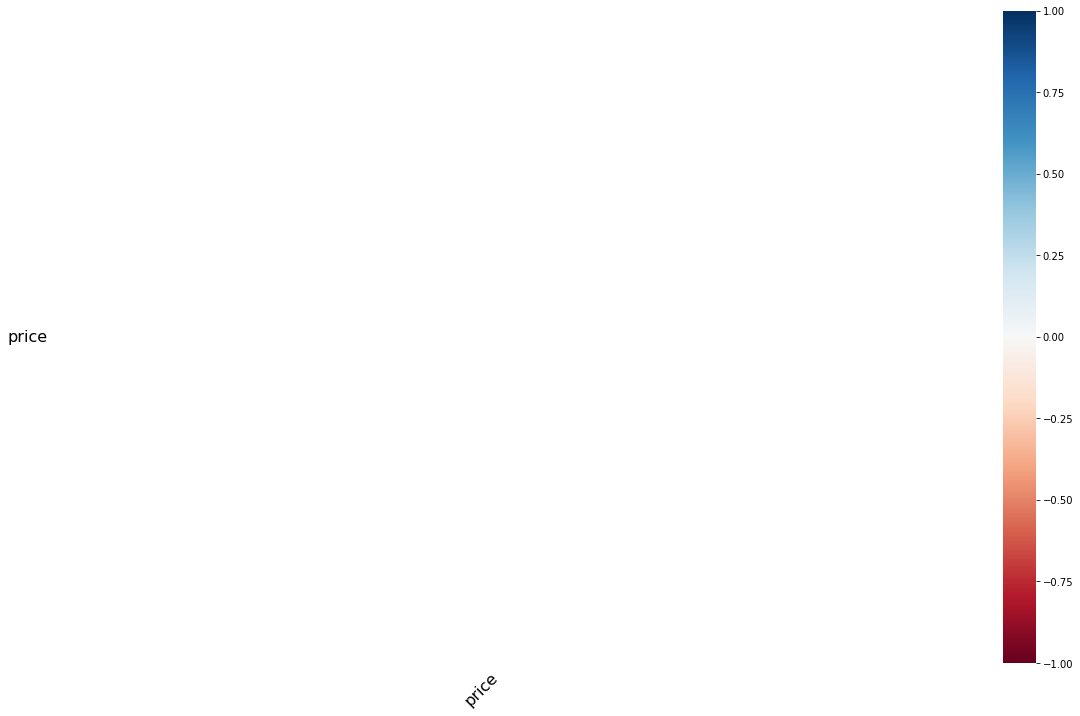

In [8]:
import missingno as msno
msno.heatmap(df_house)
#"ne marche pas le msno "

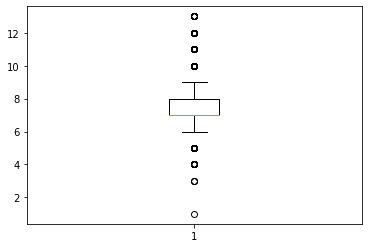

In [9]:
# Creating plot
plt.boxplot(data=df_house,x='grade')
# show plot
plt.show()

In [10]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df_house, x="grade")
fig.show()

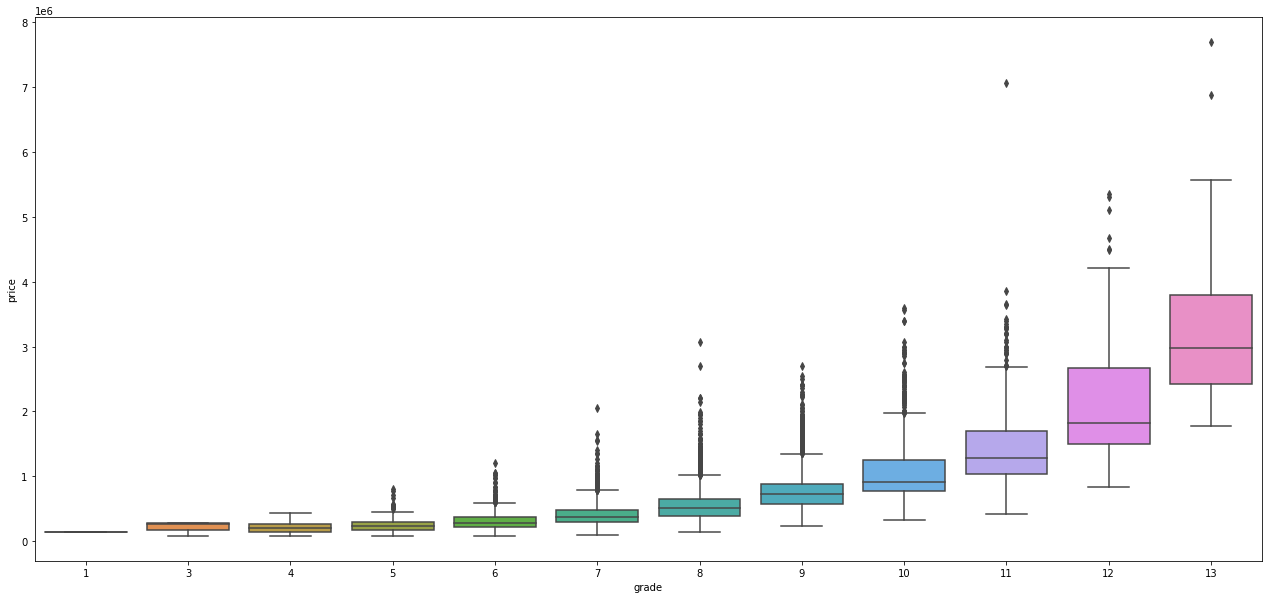

In [11]:
fig = plt.figure(figsize =(22, 10))
sns.boxplot(x='grade',y='price',data=df_house)

Effectuez une variété de régressions linéaires avec différentes entrées. A vous de trouver les variables X les plus pertinentes. La cible (y) sera la colonne des prix. N'oubliez pas de fractionner votre ensemble de données pour obtenir un score pertinent et d'imprimer votre score R2 d'ensemble de test. Comparez-le avec le score de train pour éviter le surajustement.
Les 4 dernières lignes n'ont pas de prix. Vous devrez prédire les prix et imprimer votre prédiction. Bien sûr, vous devriez faire des graphiques pour l'expliquer : vous êtes un Data Analyst !

In [20]:
df_house.isnull().any()

id               False
date             False
price             True
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [23]:
print("My DataFrame shape is : ", df_house.shape, end = '\n\n\n\n')
print('Which columns have missing values ? (Non-null column)')
print(df_house.info())

My DataFrame shape is :  (21613, 21)



Which columns have missing values ? (Non-null column)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  

In [44]:
df_house1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'predict_price'],
      dtype='object')

In [24]:
df_house1=df_house.dropna()
df_house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265


In [28]:
from sklearn.linear_model import LinearRegression

X1 = df_house1[["grade"]]

y1 = df_house1['price']


# We train a "model" with "fit" function. This model will store coefficients after training.

model = LinearRegression().fit(X1, y1)

In [29]:
model.score(X1, y1)

0.44548142753382036

**make price more corr with others columns (coor>0.5)**

In [32]:
from sklearn.linear_model import LinearRegression

X2 = df_house1[["bathrooms","grade",'sqft_living','sqft_above','sqft_living15']]

y2 = df_house1['price']


# We train a "model" with "fit" function. This model will store coefficients after training.

model = LinearRegression().fit(X2, y2)

In [33]:
model.score(X2, y2)

0.5442190651421097

In [34]:
from sklearn.linear_model import LinearRegression

X3 = df_house1[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y3 = df_house1['price']


# We train a "model" with "fit" function. This model will store coefficients after training.

model = LinearRegression().fit(X3, y3)

In [35]:
model.score(X3, y3)

0.6997710051483452

In [37]:
df_house1[ 'predict_price' ]=model.predict(X3)
df_house1

<ipython-input-37-a86be25a055f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predict_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,214338.975542
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,735284.507545
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,388863.753193
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,448098.392378
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,443256.897311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,334744.162552
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,602315.243074
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,816619.346122
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,367599.100839


In [38]:
for i, j in zip (X3.columns, model.coef_):

  print(i,j)

bedrooms -37130.95028364422
bathrooms 40210.77713873881
sqft_living 106.24962337437546
sqft_lot 0.12616600403598108
floors 10979.432692634005
waterfront 609947.7102099393
view 49722.269899991166
condition 24294.327554983167
grade 98488.77678673054
sqft_above 65.22897363674234
sqft_basement 41.02064965864746
yr_built -2635.395751094237
yr_renovated 23.39843798416314
zipcode -546.0994592806262
lat 588455.4534772914
long -200060.2969541203
sqft_living15 27.581400216480702
sqft_lot15 -0.38032963545265375


**il faut utiliser le dernière parce qu'il y a meilleur score**

In [36]:
# Juste read and execute the code below
from sklearn.model_selection import train_test_split

X = df_house1[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y = df_house1['price']

# Here, we split our 2 datasets (the variables "X" and the target "y") into 4 datasets X and y for the train set and X and y for the test set.
# We set the size of the train set to 75%. And the rest is for the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

# Here we train the model only on the train dataset.
model = LinearRegression().fit(X_train, y_train)

# And now we compare both scores :
print("\nScore for the Train dataset :", model.score(X_train, y_train))
print("Score for the Test dataset :", model.score(X_test, y_test))

The length of the initial dataset is : 21609
The length of the train dataset is   : 16206
The length of the test dataset is    : 5403

Score for the Train dataset : 0.7012834392036321
Score for the Test dataset : 0.6945757530852694


In [41]:
from datetime import datetime
df_house1["date"]=pd.to_datetime(df_house1["date"])

<ipython-input-41-0483b829da5c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



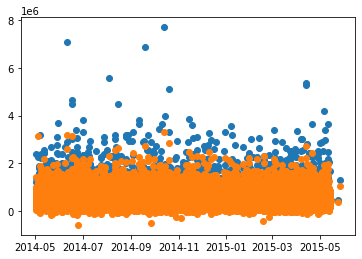

In [42]:
plt.scatter(x=df_house1['date'], y=df_house1['price'])
plt.scatter(x=df_house1['date'], y=df_house1['predict_price'])

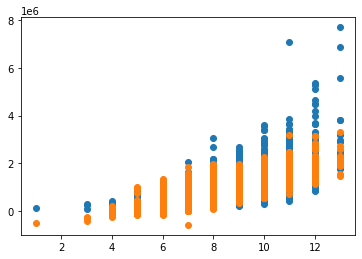

In [43]:
plt.scatter(x=df_house1['grade'], y=df_house1['price'])
plt.scatter(x=df_house1['grade'], y=df_house1['predict_price'])

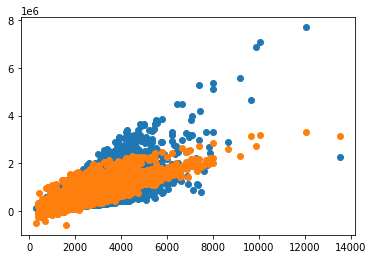

In [47]:
plt.scatter(x=df_house1['sqft_living'], y=df_house1['price'])
plt.scatter(x=df_house1['sqft_living'], y=df_house1['predict_price'])